In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import mpmath
import random as rd
from copy import deepcopy

In [3]:
# membaca dataset
df = pd.read_csv('drive/My Drive/ML/used_cars.csv')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [ ]:
# mengambil data yang akan dipakai
df1 = df[['manufacturer','price','odometer']].copy()

In [ ]:
# menspesifikasikan manufactur mobil
df2 = df1.loc[df1['manufacturer'] == 'ford']

<Figure size 750x750 with 0 Axes>

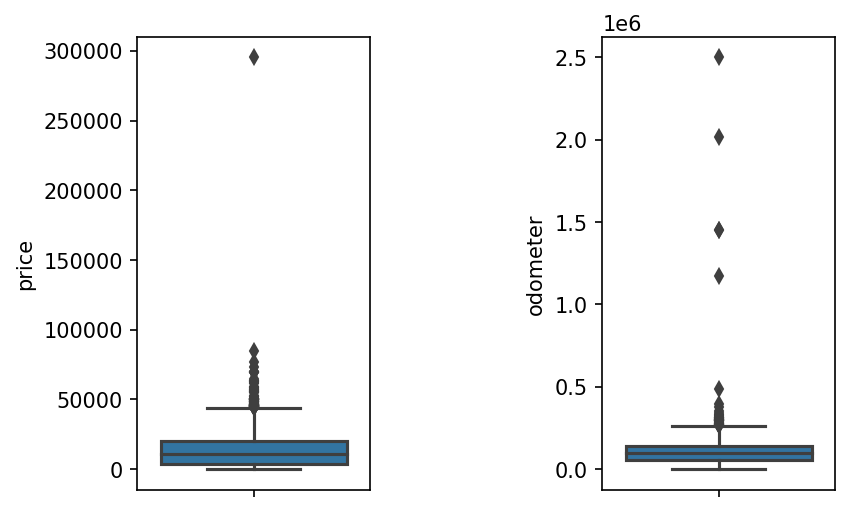

In [ ]:
# melihat sebaran outlier sebelum data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df2["price"], ax=axes[0])
sns.boxplot(y=df2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
# data cleansing
df2.dropna(inplace=True)
drop1 = df2.drop(df2.loc[df2['price'] < 600].index, inplace=True)
drop2 = df2.drop(df2.loc[df2['price'] > 49000].index, inplace=True)
drop3 = df2.drop(df2.loc[df2['odometer'] > 120000].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# melihat jumlah data yang bernilai Null
df2.isnull().sum()

manufacturer    0
price           0
odometer        0
dtype: int64

<Figure size 750x750 with 0 Axes>

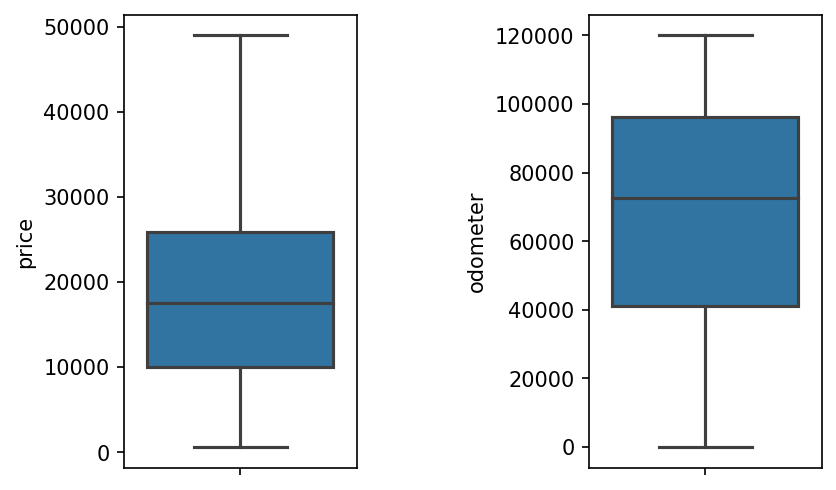

In [ ]:
# melihat sebaran outlier setelah data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df2["price"], ax=axes[0])
sns.boxplot(y=df2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
# menentukan ukuran dan style plot
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')

Text(0, 0.5, 'Odometer (Km)')

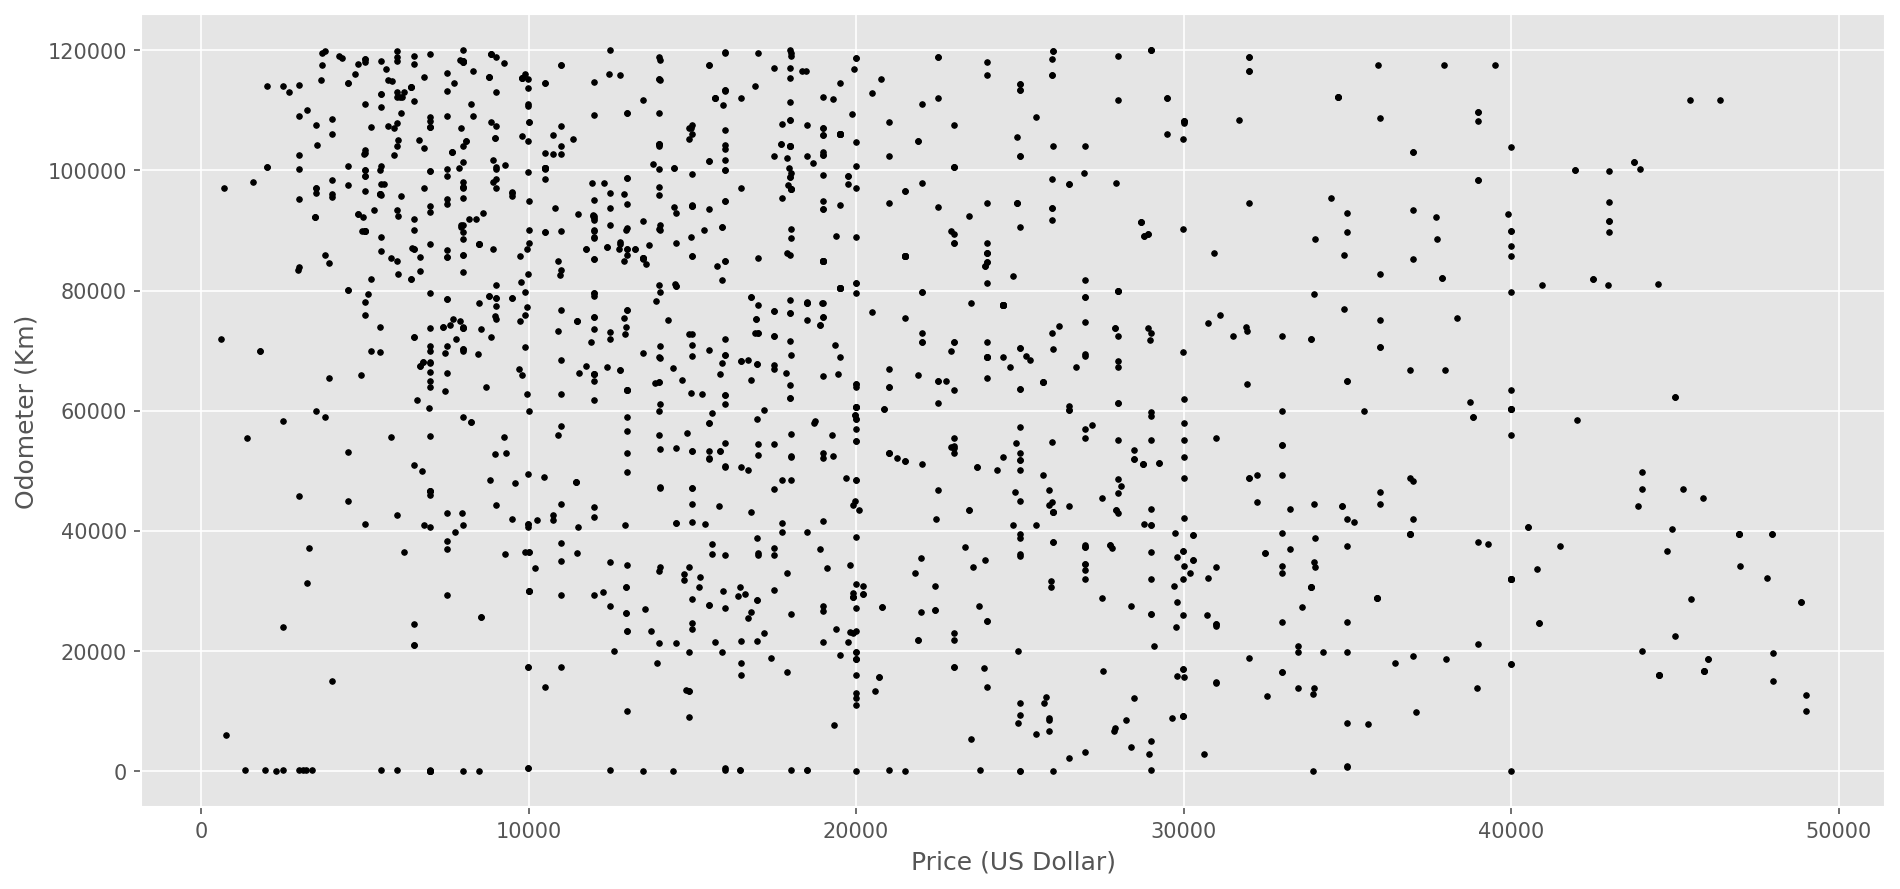

In [ ]:
# mengambil value dan plotting data
f1 = df2['price'].values
f2 = df2['odometer'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Price (US Dollar)')
plt.ylabel('Odometer (Km)')

In [ ]:
# menghitung Euclidean Distance
def dist(a, b, ax=1):
  return np.linalg.norm(a - b, axis=ax)

In [ ]:
# jumlah clusters
k = 3

# koordinat x dari random centroids
C_x = np.random.randint(0, np.max(50000), size=k)

# koordinat y dari random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[43745. 57823.]
 [ 3953. 55998.]
 [34529. 58083.]]


Text(0, 0.5, 'Odometer (Km)')

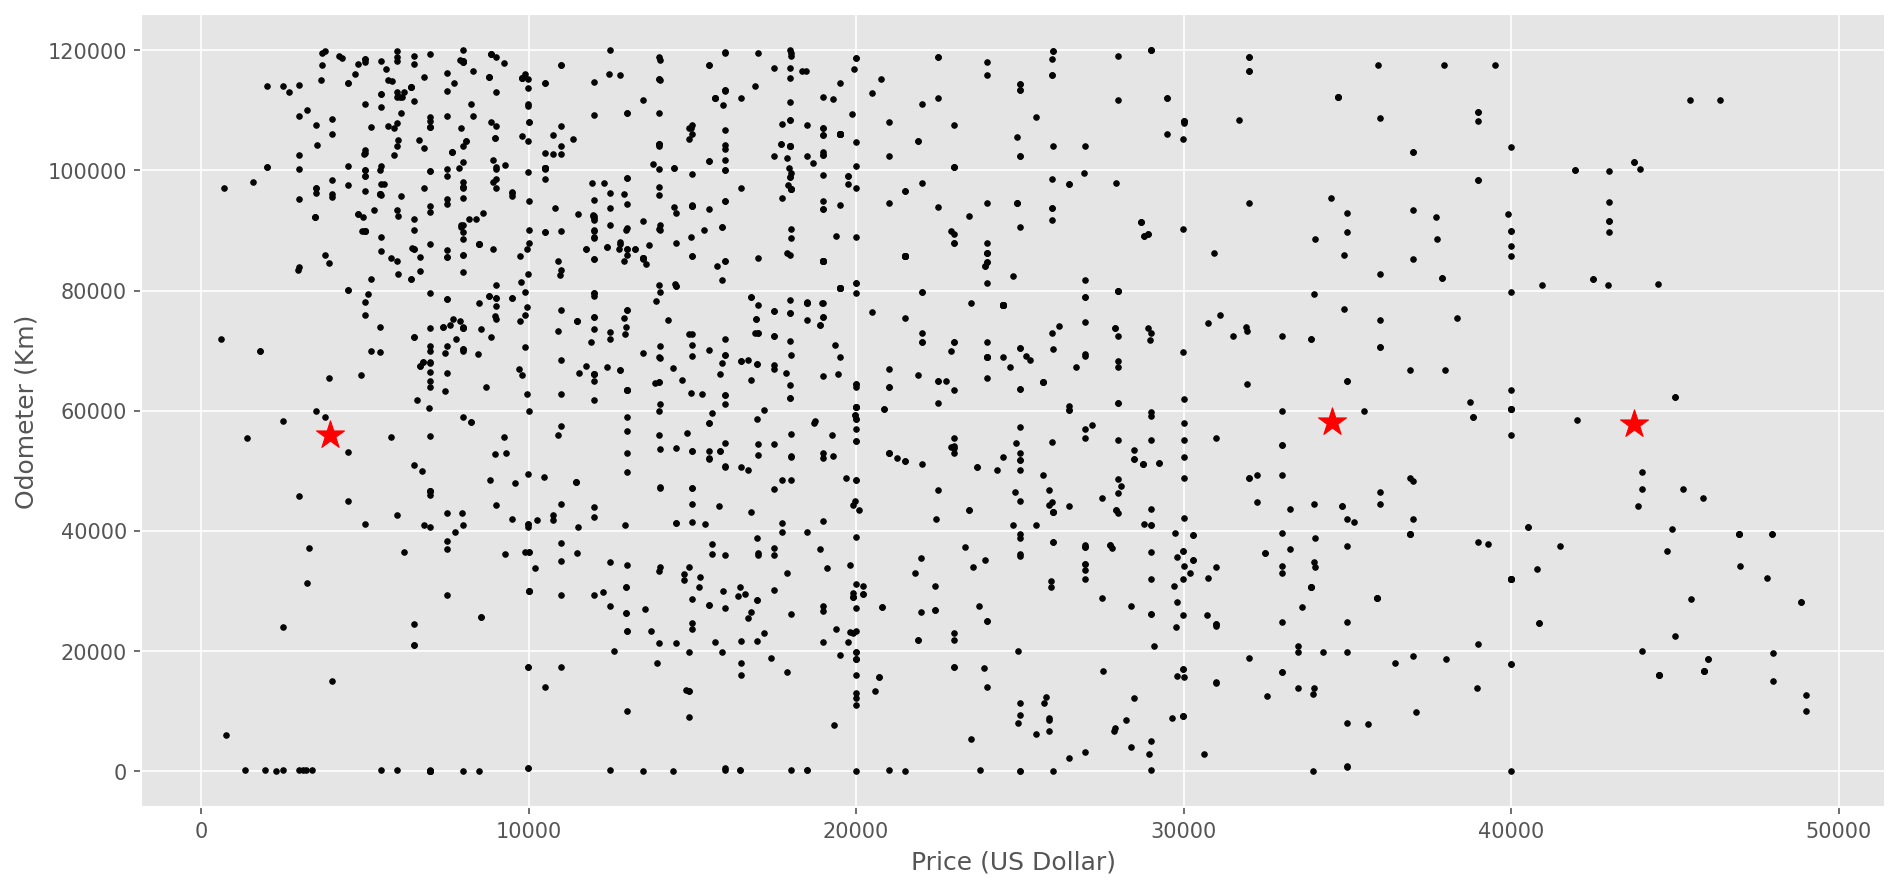

In [ ]:
# Plotting bersamaan dengan centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')
plt.xlabel('Price (US Dollar)')
plt.ylabel('Odometer (Km)')

In [ ]:
### Jika proses running tidak berhenti/terus berjalan pada cell ini, mohon untuk di running ulang semua. Karena sering terjadi hal seperti itu.

# untuk menyimpan nilai centroids ketika di update
C_old = np.zeros(C.shape)

# label clusters (0, 1)
clusters = np.zeros(len(X))

# jarak antara centroid baru dan centroid lama
error = dist(C, C_old, None)

# looping akan berhenti ketika error = 0
while error != 0:
  
  # assign setiap value dengan cluster terdekatnya
  for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
  
  # menyimpan nilai centroid yang lama
  C_old = deepcopy(C)
  
  # mencari centroid baru dengan mengambil nilai rata-rata
  for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
  error = dist(C, C_old, None)

Text(0, 0.5, 'Odometer (Km)')

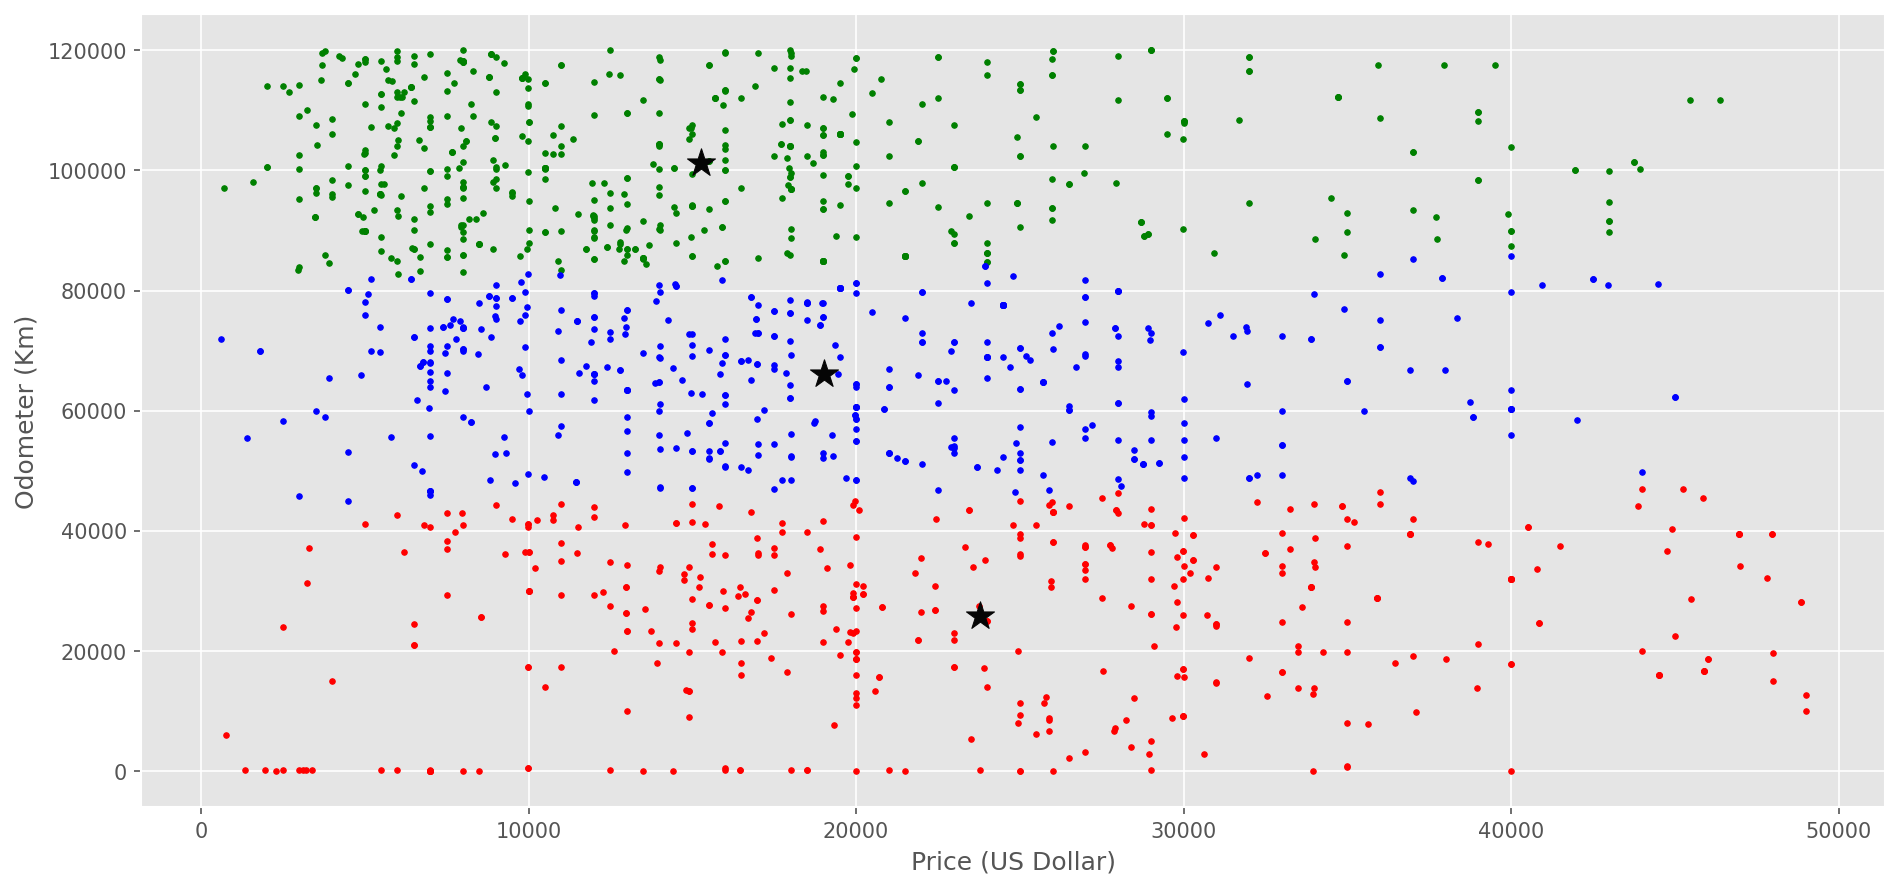

In [ ]:
# plotting dengan posisi centroid terbaru
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
  points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('Price (US Dollar)')
plt.ylabel('Odometer (Km)')